# Six-bar mechanism balancing

###### Luis Eduardo Robles Jiménez

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#### Constraints

$$ -0.16m \leq x_{cn}, y_{cn} \leq 0.16m $$

$$ 0.005m \leq t_{cn} \leq 0.04m $$

### Read data from a file

In [2]:
"""
# The very best examples, to understand how good solutions behave
fitness = np.loadtxt("1671649703Fitness.txt")
samples = np.loadtxt("1671649703Population.txt")
# Solutions under 1.0
fitness = np.loadtxt("1671919014Fitness.txt")
samples = np.loadtxt("1671919014Population.txt")
"""
# Broader space
# 10% best solutions, 50% Under 1.0 solutions, 50% random solutions.
samples = np.loadtxt("1671988185Population.txt")
fitness = np.loadtxt("1671988185Fitness.txt")
shForces = np.loadtxt("1671988185ShForces.txt")
shMoments = np.loadtxt("1671988185ShMoments.txt")

print(samples.shape)
print(fitness.shape)
print(shForces.shape)
print(shMoments.shape)

(500, 15)
(500,)
(500,)
(500,)


In [3]:
nSamples, nVariables = samples.shape
nWeights = nVariables // 3

## Dimensionality reduction

### Feature extraction

#### Find optimal values

In [4]:
optimal = np.where(fitness < 1)[0]

#### Thicknesses

In [5]:
thicknesses = samples[:, 2::3]

#### Radiuses

In [6]:
radiuses = np.sqrt(np.square(samples[:, ::3]) + np.square(samples[:, 1::3]))

#### Masses

This is a problem-specific feature that can be got from variables.

These calculations are intended to be used later on to find out whether this is a good representant of the solutions or not.

The mass can be easily calculated with the resulting formula of the following steps.

##### Formula

$$\sigma_i = \frac{m_i}{V_i}$$

$$m_i = V_i \sigma_i$$

$$m_i = (r_i^2 t_i \pi)(\sigma_i)$$

$$m_i = (\sqrt{x_i^2 + y_i^2}^2 t_i \pi)(\sigma_i)$$

$$m_i = (x_i^2 + y_i^2) t_i \pi\sigma_i$$

##### Considering that

$\sigma$ is density. In this problem: $\sigma_i = 7800 \frac{kg}{m^3}$

$m$ is mass $(kg)$

$V$ is volume; of a cylinder in this problem $(m^3)$ 

$x, y$ are the relative coordinates of the weight centers. $(m)$

In [7]:
masses = np.zeros((nSamples, nWeights))
density = 7800
for i in range(nWeights):
    masses[:, i] = (samples[:, i*3]**2 + samples[:, i*3 + 1]**2) * samples[:, i*3 + 2] * np.pi * density
sumMasses = np.sum(masses, axis = 1)

#### PCA

This method seems to be able to explain almost all the variance with 10 variables only. 

Check out what happened with the dataset of the [best solutions](https://github.com/LuisR-jpg/School/blob/f3de4d9b40f10411e9dc8e567c7f187ca809ea88/Courses%20and%20Miscellaneous/Research/Analysis.ipynb) only, and the one with [feasible solutions](https://github.com/LuisR-jpg/School/blob/4b0d6708ef37632deab804939f9791ba9974623a/Courses%20and%20Miscellaneous/Research/Analysis.ipynb) only.

In [8]:
modelPCA = PCA()
modelPCA.fit(samples)
dataPCA = modelPCA.transform(samples)
dataPCA.shape

(500, 15)

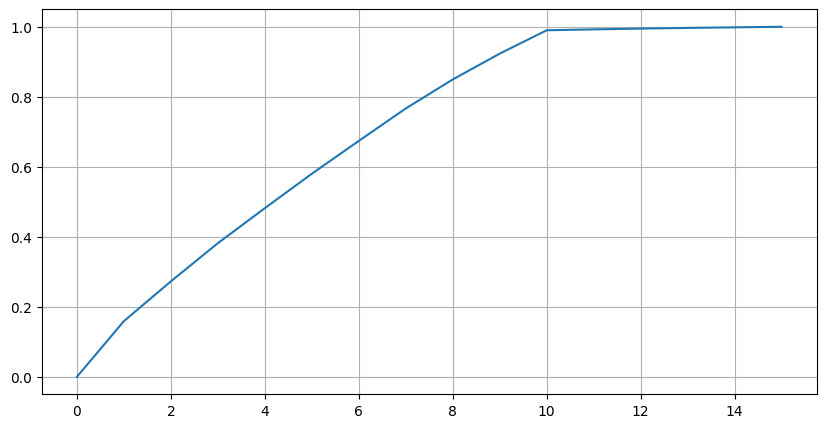

In [9]:
expVar = modelPCA.explained_variance_ratio_
expVarCum = np.cumsum(expVar)
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(np.concatenate(([0], expVarCum)))
plt.show()

##### First two main components

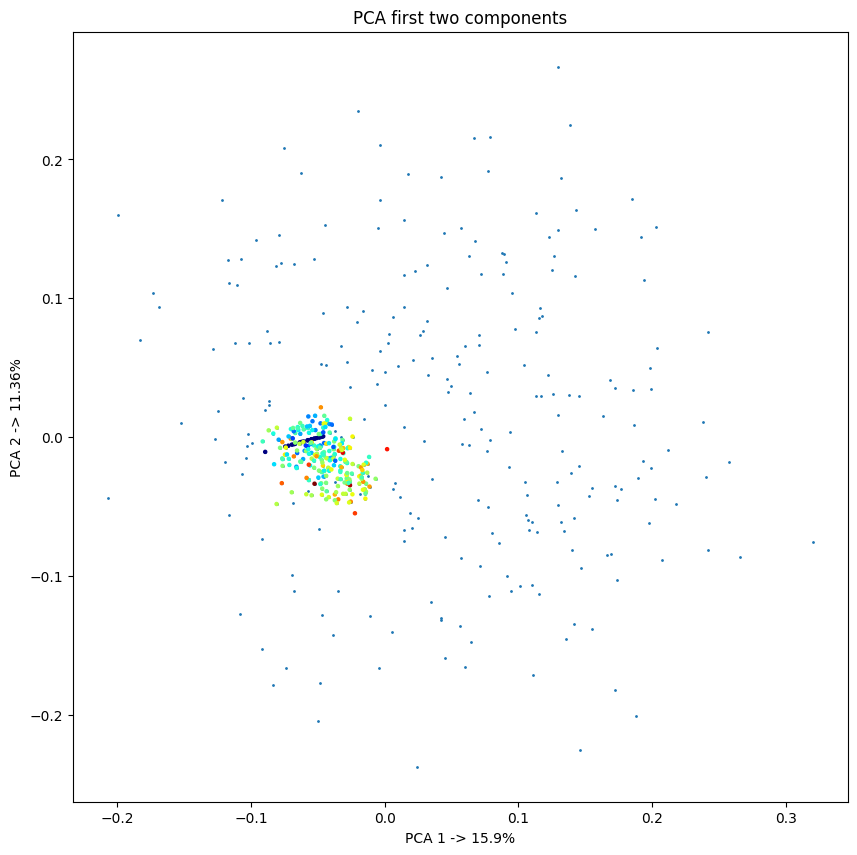

In [10]:
dataPCA = dataPCA[:, :2]
plt.figure(figsize=(10, 10))
plt.title("PCA first two components")
plt.scatter(dataPCA[:, 0], dataPCA[:, 1], s = 1)
plt.scatter(dataPCA[optimal, 0], dataPCA[optimal, 1], s = 5, c = fitness[optimal], cmap = 'jet')
plt.xlabel("PCA 1 -> " + str(np.round(expVar[0]*100, 2)) + "%")
plt.ylabel("PCA 2 -> " + str(np.round(expVar[1]*100, 2)) + "%")
plt.show()

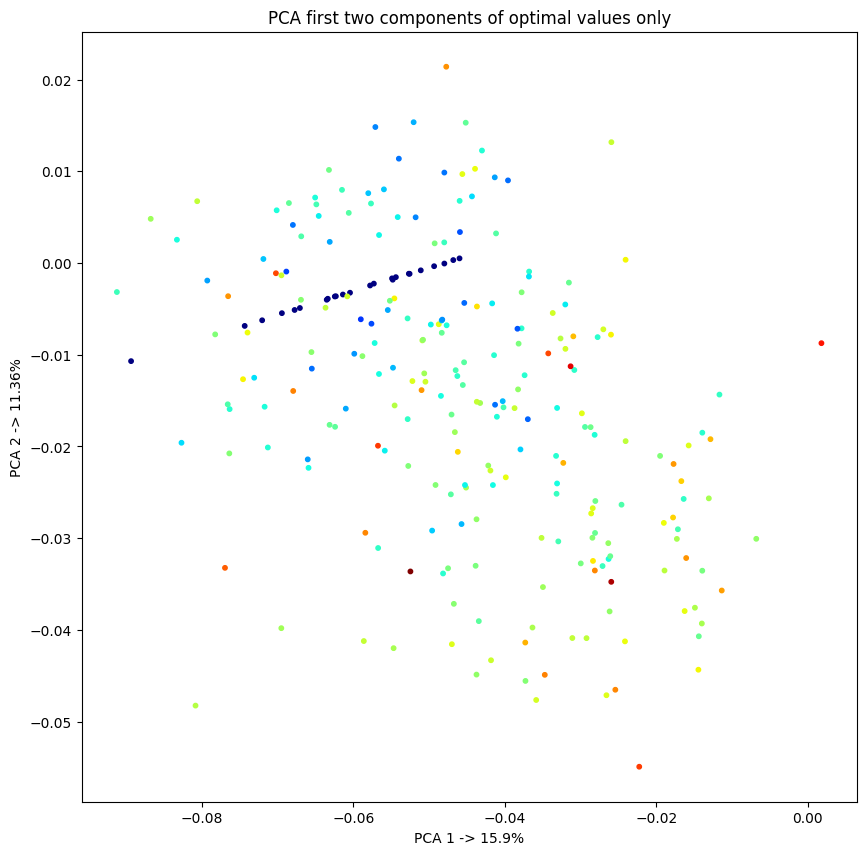

In [11]:
plt.figure(figsize=(10, 10))
plt.title("PCA first two components of optimal values only")
plt.scatter(dataPCA[optimal, 0], dataPCA[optimal, 1], s = 10, c = fitness[optimal], cmap = 'jet')
plt.xlabel("PCA 1 -> " + str(np.round(expVar[0]*100, 2)) + "%")
plt.ylabel("PCA 2 -> " + str(np.round(expVar[1]*100, 2)) + "%")
plt.show()

## Data visualization

### Parallel coordinates 

#### All variables

- Figure 1.

    Decent solutions seem to follow a pattern of trying to find the equilibrium between thickness and position. So the weights might be optimal with a determined mass value.

- Figure 2.

    The very best solutions have in common a non-flexible, almost fixed set of values for weights 1, 3, 4 and 5. Where 4 and 5 have a set of different thicknesses because their positions are 0, so the mass is not existant, since there's no area.

In [12]:
fig = px.parallel_coordinates(samples, title = "Mechanism balancing samples",
                            color = fitness,
                            labels=["x One", "y One", "t One", "x Two", "y Two", "t Two", "x Three", "y Three", "t Three", "x Four", "y Four", "t Four", "x Five", "y Five", "t Five", "Fitness"],
                            color_continuous_scale=px.colors.sequential.Jet)
fig.show()
fig = px.parallel_coordinates(samples[optimal], title = "Mechanism balancing samples",
                            color = fitness[optimal],
                            labels=["x One", "y One", "t One", "x Two", "y Two", "t Two", "x Three", "y Three", "t Three", "x Four", "y Four", "t Four", "x Five", "y Five", "t Five", "Fitness"],
                            color_continuous_scale=px.colors.sequential.Jet)
fig.show()

#### Masses

- Figure 1.
    
    The masses seem to describe a consistent behavior on their weights. 

- Figure 2. 

    This graph shows that masses might be a good tool to understand the behavior of the weights. It's confirmed that all weights but the second have a fixed optimal mass, and the last two are close to zero.

In [13]:
fig = px.parallel_coordinates(masses, title = "Samples' masses",
                            color = fitness,
                            labels=["mass One", "mass Two", "mass Three", "mass Four", "mass Five", "Fitness"],
                            color_continuous_scale=px.colors.sequential.Jet)
fig.show()
fig = px.parallel_coordinates(masses[optimal], title = "Samples' masses",
                            color = fitness[optimal],
                            labels=["mass One", "mass Two", "mass Three", "mass Four", "mass Five", "Fitness"],
                            color_continuous_scale=px.colors.sequential.Jet)
fig.show()

#### Shaking moment vs Shaking force

This graph shows the behavior of the Pareto efficient solutions, where the improvement on the optimization of one variable, directly affects others'.

In [14]:
fig = px.parallel_coordinates({"Shaking Moment": shMoments[optimal], "Shaking Force": shForces[optimal], "Fitness": fitness[optimal]}, title = "Multiobjective optimization behavior",
                            color = "Fitness",
                            color_continuous_scale=px.colors.sequential.Jet)
fig.show()

### Violinplot

This graph is created with hopes of seeing if  masses have a tendency. 

These graphs help to show:

1. Weight 1 has a short range where it values are optimal, and the frequency seems to indicate that the smaller it is, the better it works.

2. Weight 2 shows an interesting dynamic range, it's large and might ressemble a normal distribution.

3. Weight 3 clearly shows it's tendency for a specific mass near the maximum limit.

4. Weight 4 seems optimal when it's as small as possible.

5. Weight 5 same behavior as 4.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bac29dcd00>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bac279b760>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bac29ac7f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bac29afb50>}

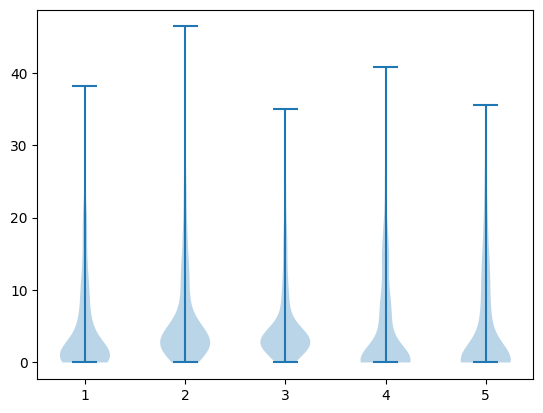

In [15]:
plt.violinplot(masses)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bacc00b2e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bacc00b250>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bace6a09a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bace6a0e20>}

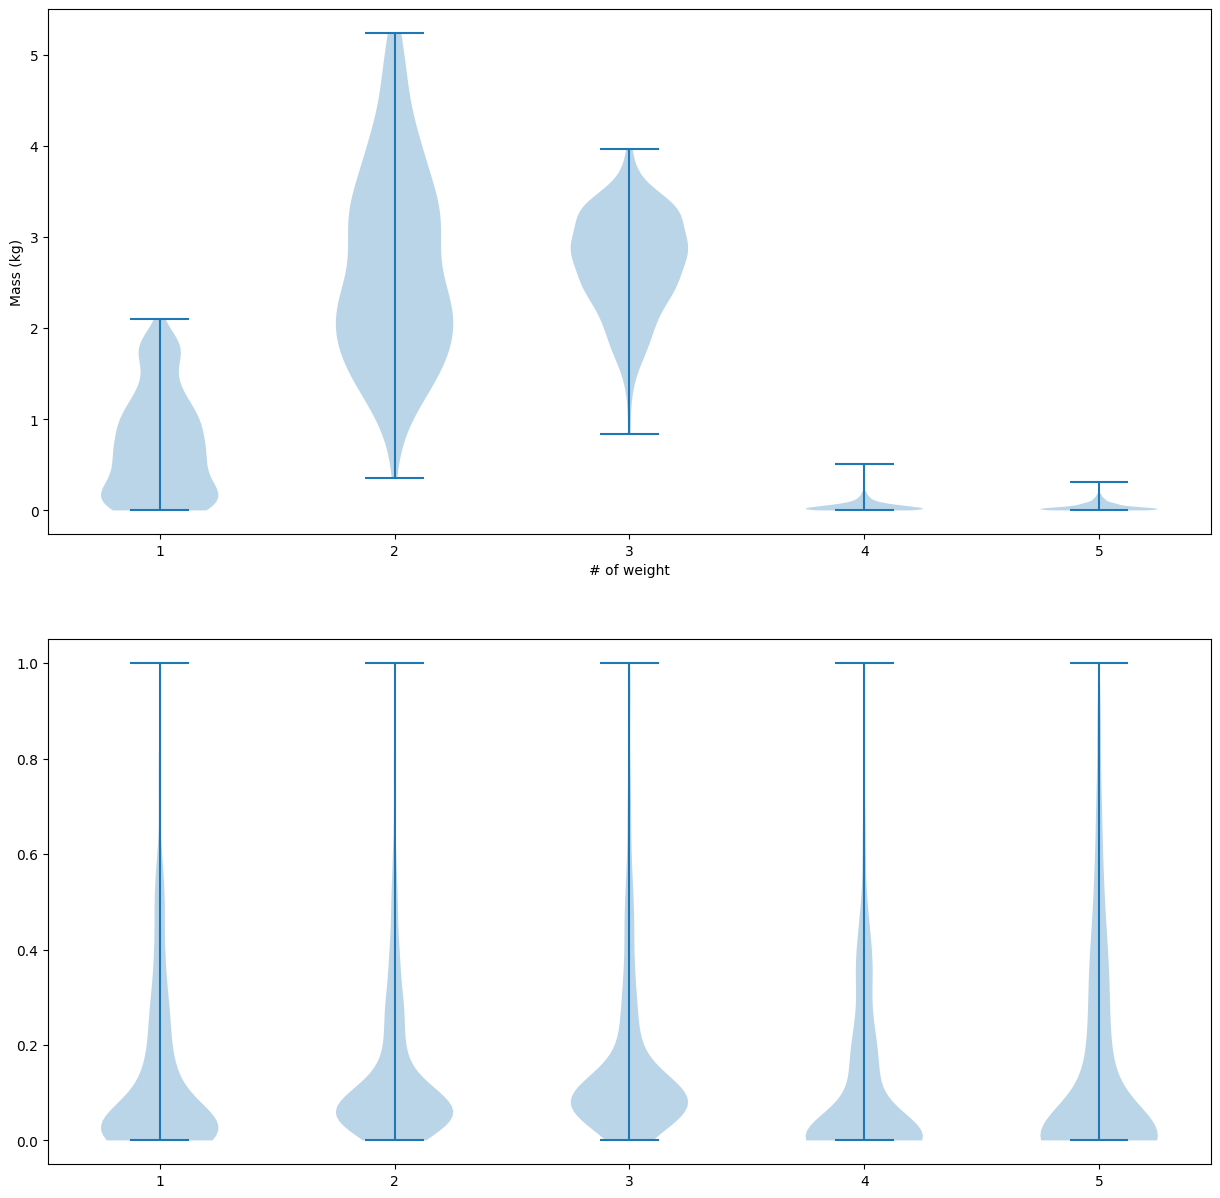

In [56]:
fig = plt.figure(figsize =(15, 15))
plt.subplot(2, 1, 1)
plt.xlabel("# of weight")
plt.ylabel("Mass (kg)")
plt.violinplot(masses[optimal])
nMasses = np.copy(masses)
for m in range(nWeights):
    nMasses[:, m] = masses[:, m]/np.max(masses[:, m])
plt.subplot(2, 1, 2)
plt.violinplot(nMasses)

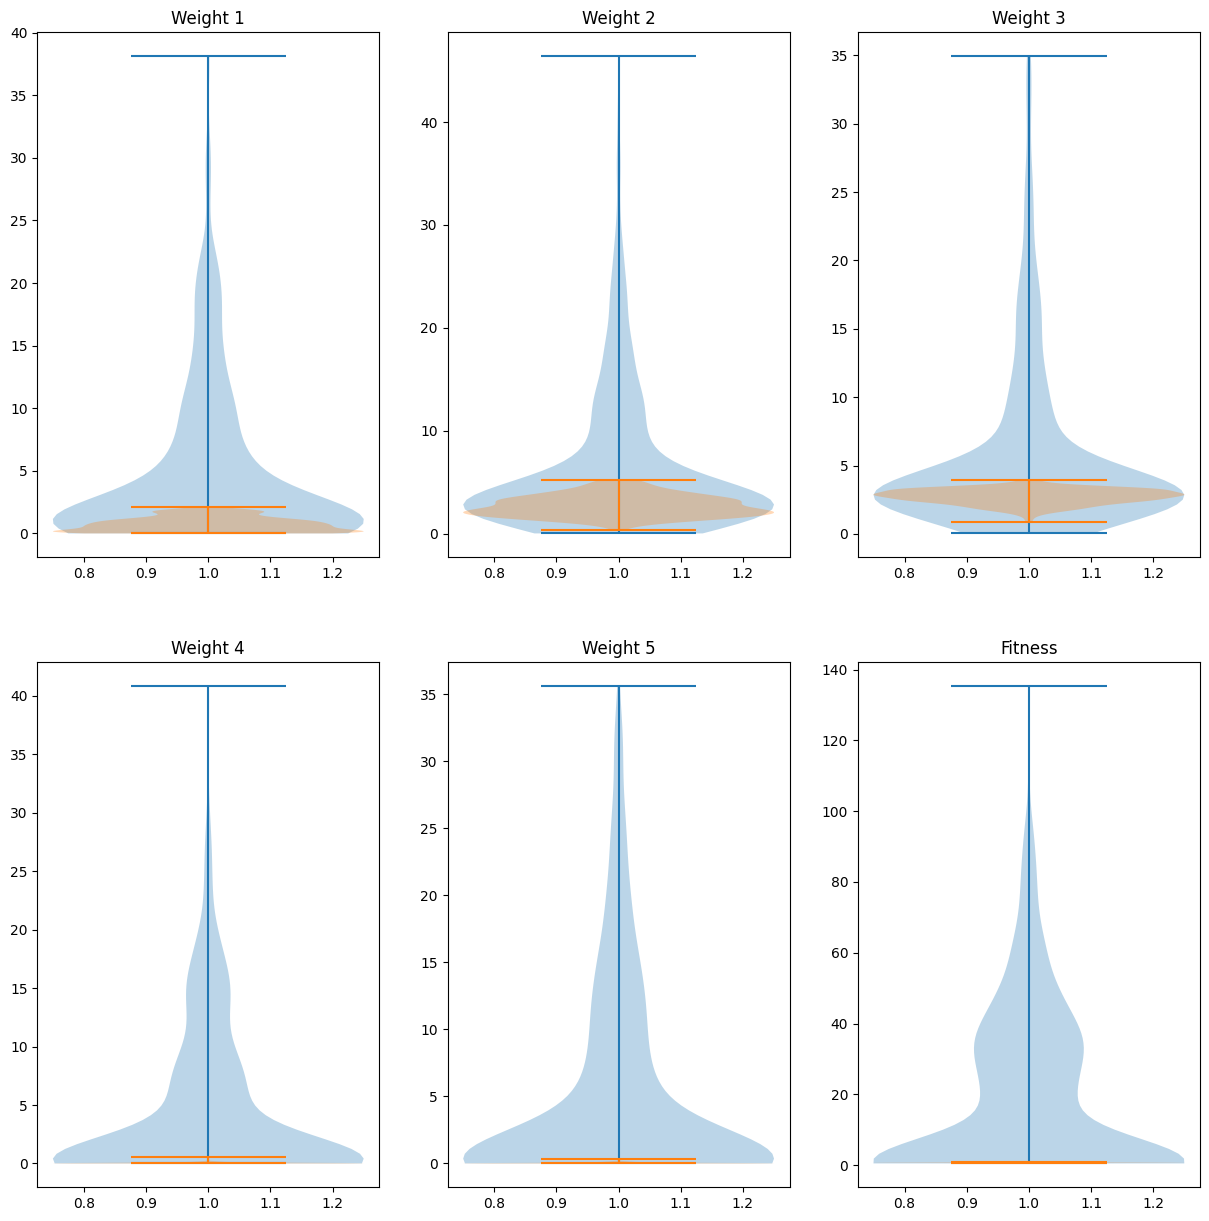

In [17]:
fig = plt.figure(figsize =(15, 15))
for i in range(nWeights):
    plt.subplot(2, 3, i + 1)
    plt.title("Weight " + str(i + 1))
    plt.violinplot(masses[:, i])
    plt.violinplot(masses[optimal, i])
plt.subplot(2, 3, 6)
plt.title("Fitness")
plt.violinplot(fitness)
plt.violinplot(fitness[optimal])
plt.show()

### Scatter plot

Let's try to see if there's a relation between the masses of the weights and their fitness.

#### Observations

- Weight 2 seems to be optimal in a bunch of different values. Why? 

- The other solutions are consistent on an unique optimal value. 

- Fwiw, points above the optimal ones mean that the results can be heavily affected by other variables.

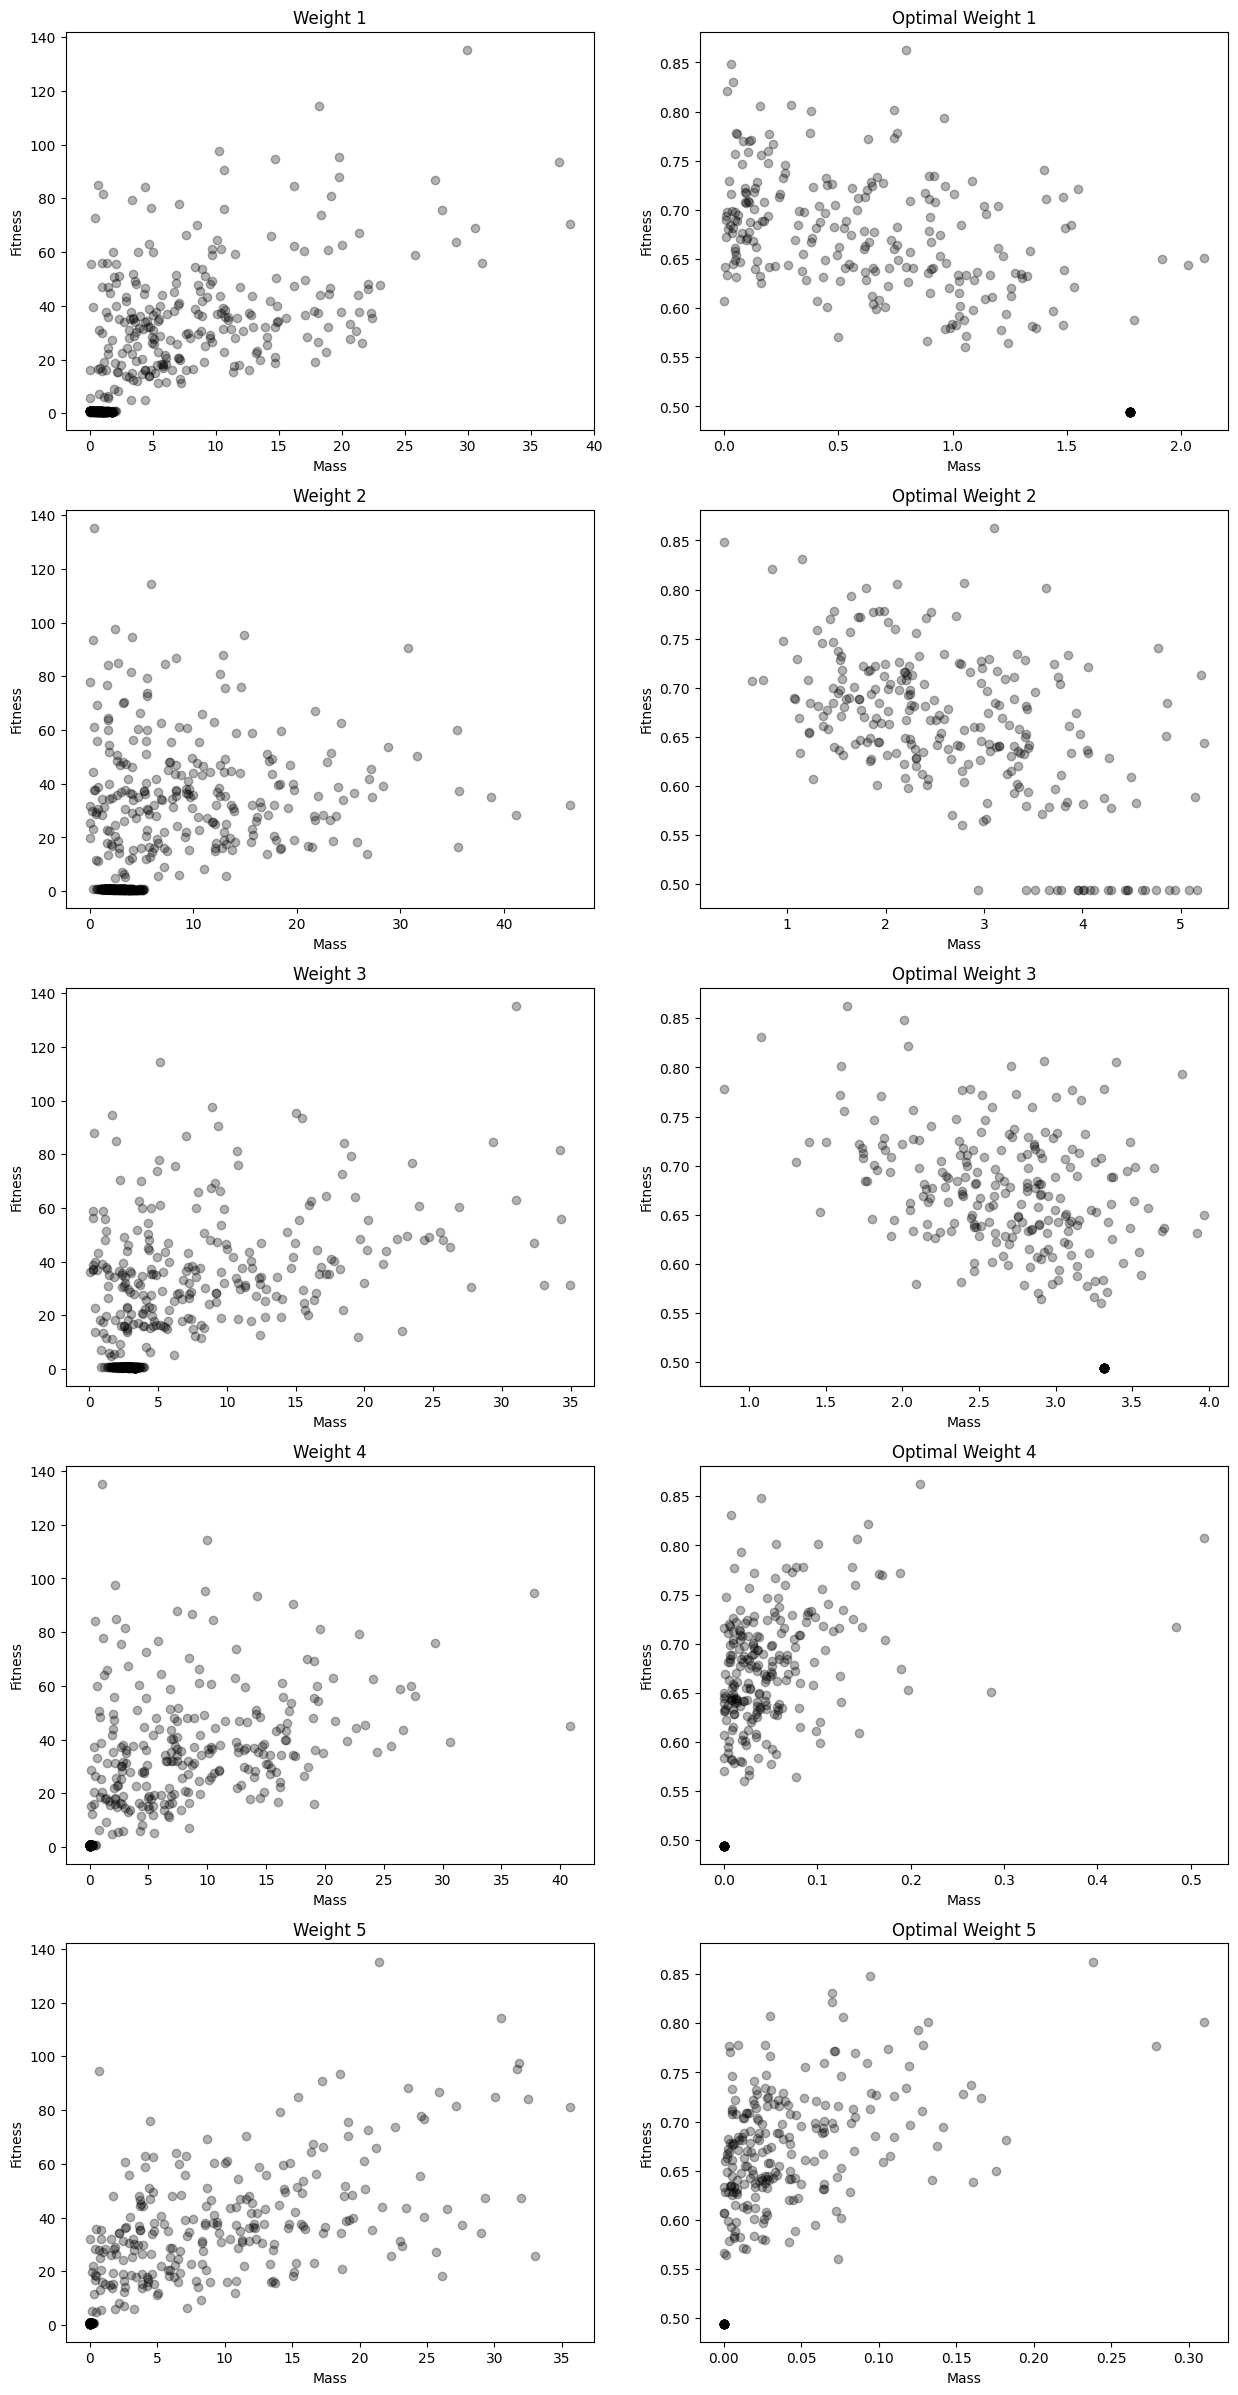

In [18]:
fig = plt.figure(figsize =(15, 30))
for i in range(nWeights):
    plt.subplot(5, 2, i*2 + 1)
    plt.title("Weight " + str(i + 1))
    plt.scatter(masses[:, i], fitness, alpha = 0.3, color = '0')
    plt.xlabel("Mass")
    plt.ylabel("Fitness")
    plt.subplot(5, 2, i*2 + 2)
    plt.title("Optimal Weight " + str(i + 1))
    plt.scatter(masses[optimal, i], fitness[optimal], alpha = 0.3, color = '0')
    plt.xlabel("Mass")
    plt.ylabel("Fitness")

#### Total mass

It's possible to see how worse the solutions get with weights that are outside a determined range.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bac0541750>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bac0541870>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bac0542f50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1babe195f90>}

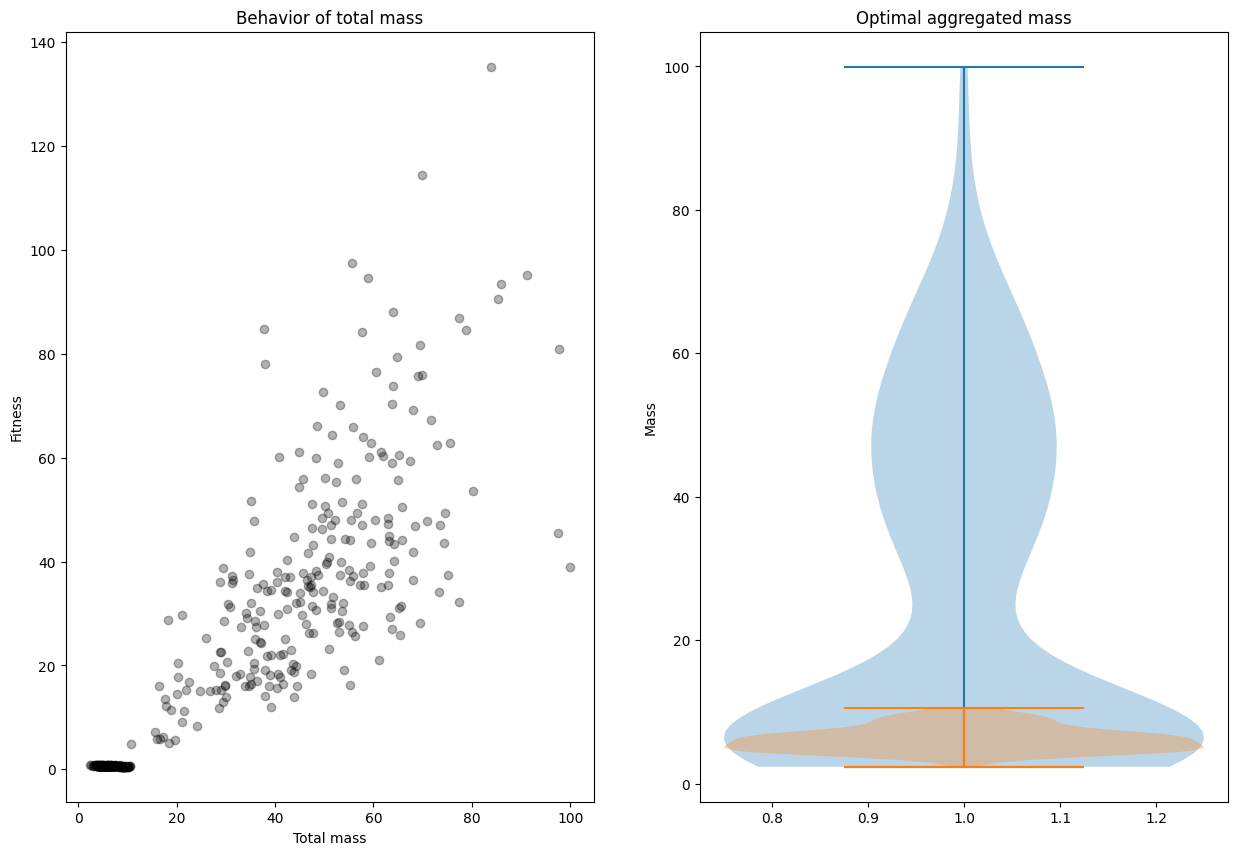

In [19]:
plt.figure(figsize=(15, 10))
plt.grid(which="both")
plt.subplot(1, 2, 1)
plt.scatter(sumMasses, fitness, alpha = 0.3, color = '0')
plt.title("Behavior of total mass")
plt.xlabel("Total mass")
plt.ylabel("Fitness")
plt.subplot(1, 2, 2)
plt.title("Optimal aggregated mass")
plt.ylabel("Mass")
plt.violinplot(sumMasses)
plt.violinplot(sumMasses[optimal])

#### Pareto front

A more common way to show the Pareto front.

The special dark dot that indicates the best solution comes from the dataset that polished the solution, that presumably is the very best solution of this problem.

Text(0, 0.5, 'Shaking Moment')

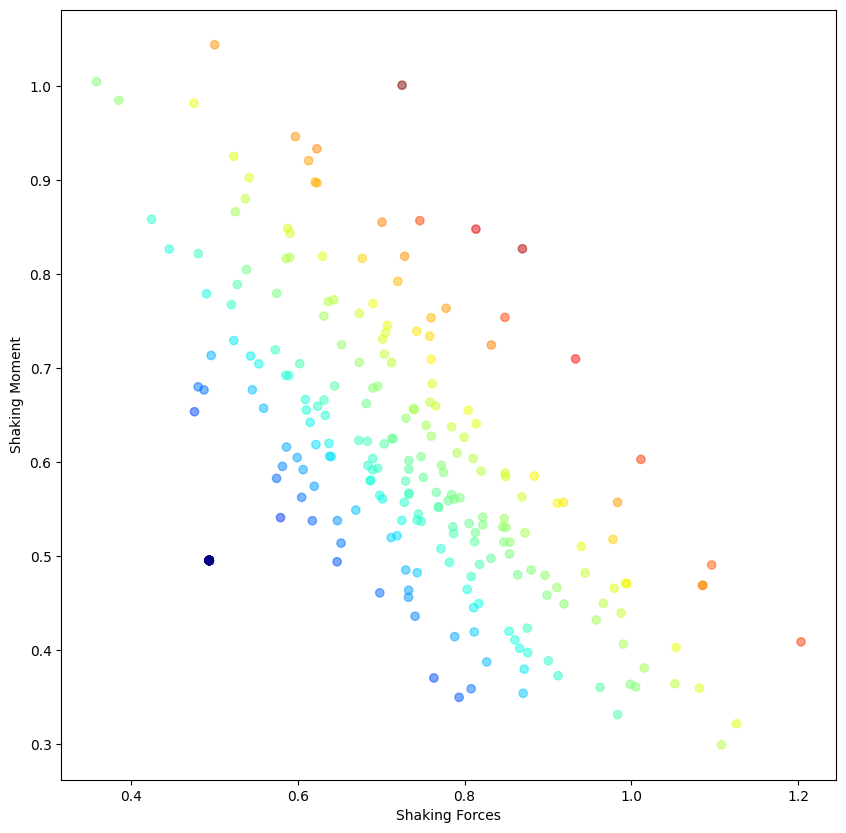

In [20]:
plt.figure(figsize = (10, 10))
plt.scatter(shForces[optimal], shMoments[optimal], alpha = 0.5, c = fitness[optimal], cmap = "jet")
plt.xlabel("Shaking Forces")
plt.ylabel("Shaking Moment")

#### Relation between thickness and radius

- Once again, it demonstrates that these two variables work together to reach the optimal mass.

- Got the gut feeling that we can get better conclusions out of this.

Text(0, 0.5, 'Thickness1')

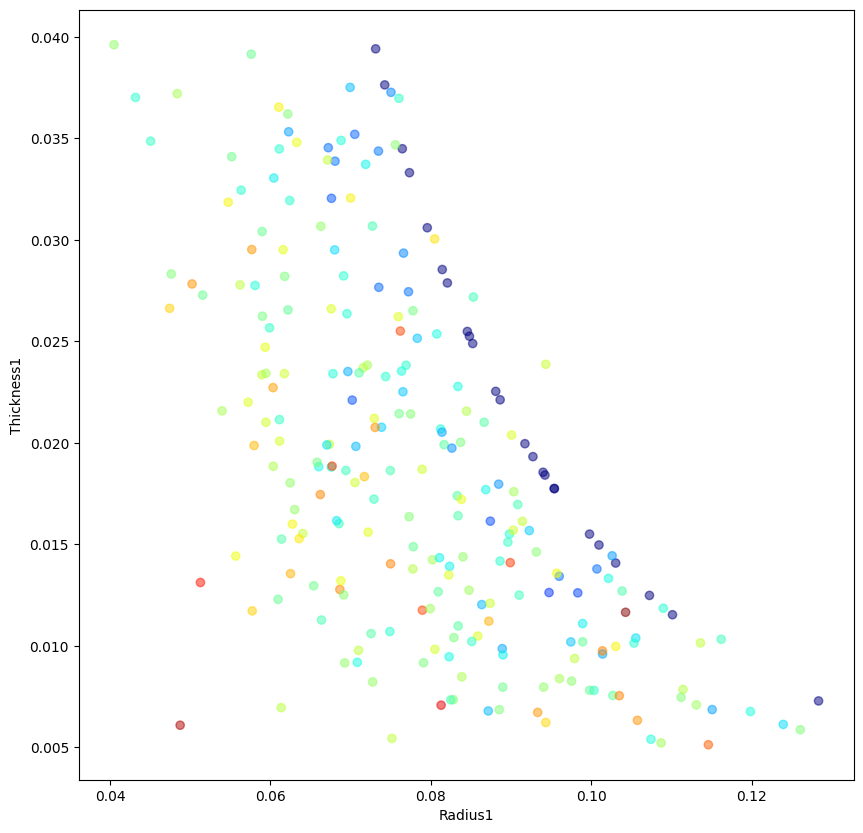

In [21]:
plt.figure(figsize=(10, 10))
weight = 1
plt.scatter(radiuses[optimal, weight], thicknesses[optimal, weight], c = fitness[optimal], alpha = 0.5, cmap = "jet")
#plt.contour(radiuses[optimal, 0], thicknesses[optimal, 0], fitness[optimal])
plt.xlabel("Radius" + str(weight))
plt.ylabel("Thickness" + str(weight))
#plt.scatter(sumMasses[optimal], shMoments[optimal], c = "b", alpha = 0.5)

#### Fitness 

This feature is the average of both functions

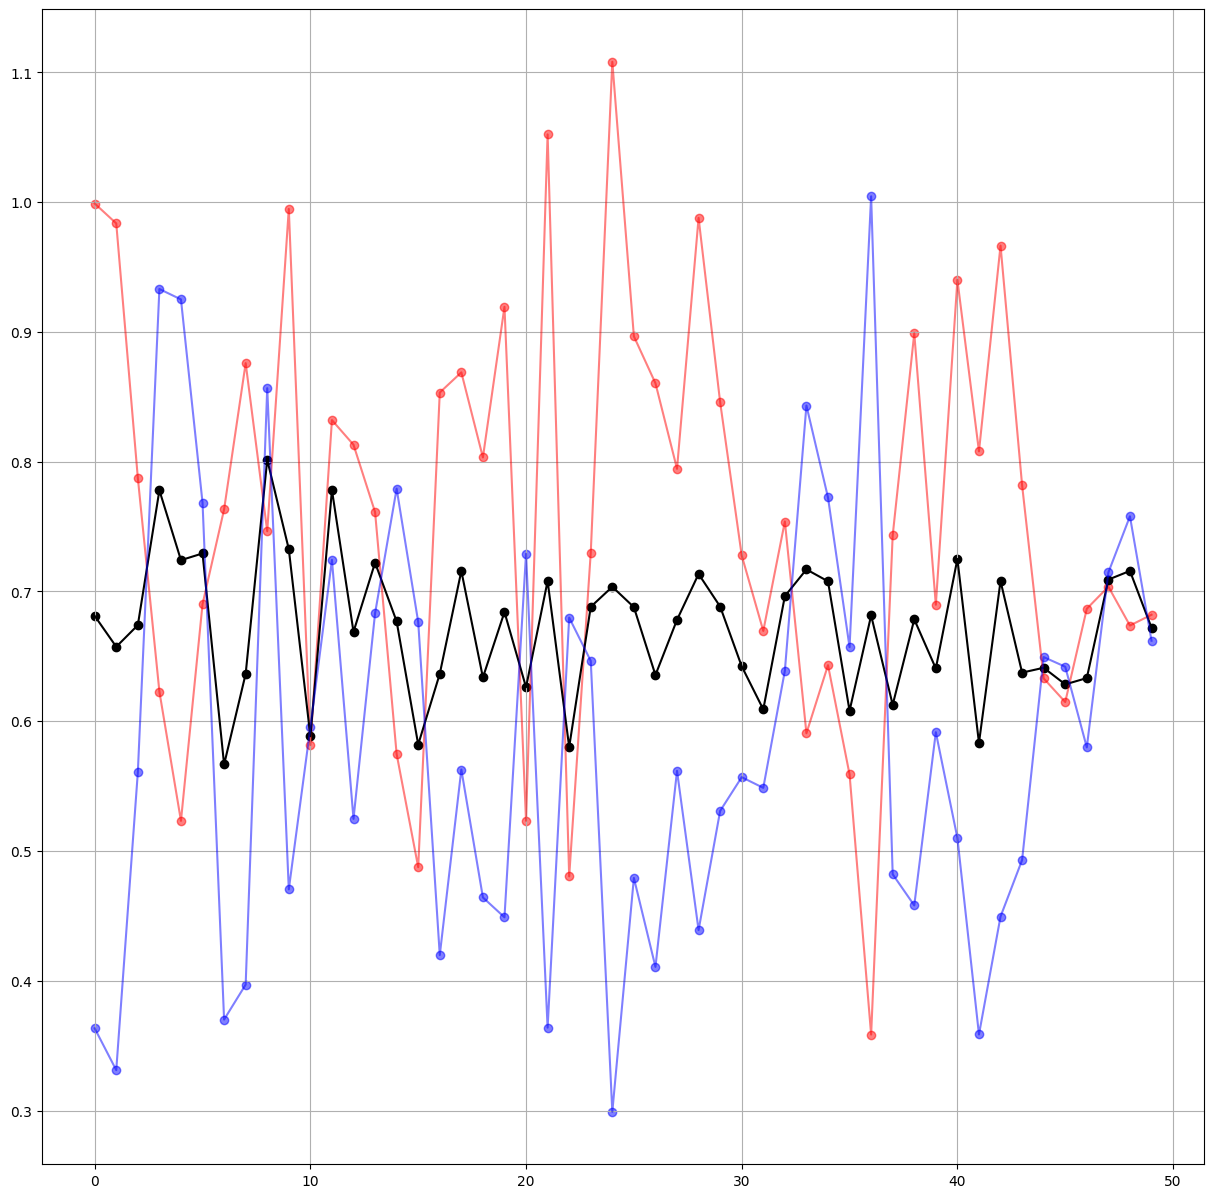

In [22]:
plt.figure(figsize = (15, 15))
plt.plot(range(len(optimal[50:100])), shForces[optimal[50:100]], c = 'r', alpha = 0.5)
plt.scatter(range(len(optimal[50:100])), shForces[optimal[50:100]], c = 'r', alpha = 0.5)
plt.plot(range(len(optimal[50:100])), fitness[optimal[50:100]], c = "0")
plt.scatter(range(len(optimal[50:100])), fitness[optimal[50:100]], c = "0")
plt.plot(range(len(optimal[50:100])), shMoments[optimal[50:100]], c = 'b', alpha = 0.5)
plt.scatter(range(len(optimal[50:100])), shMoments[optimal[50:100]], c = 'b', alpha = 0.5)
plt.grid(which="both")